In [10]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\Admin\Desktop\MoldX\MPC51_SMS.csv'

# Try reading with a different encoding
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the dataset
df.head()

,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


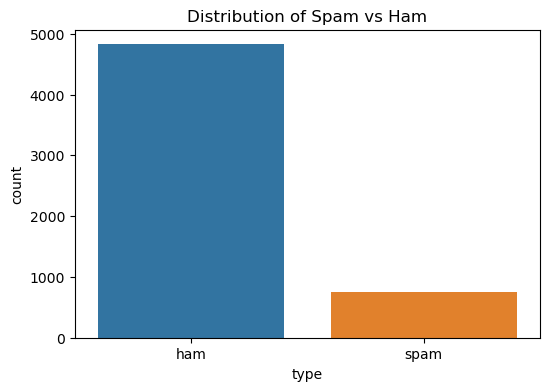

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of spam vs ham
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Distribution of Spam vs Ham')
plt.show()


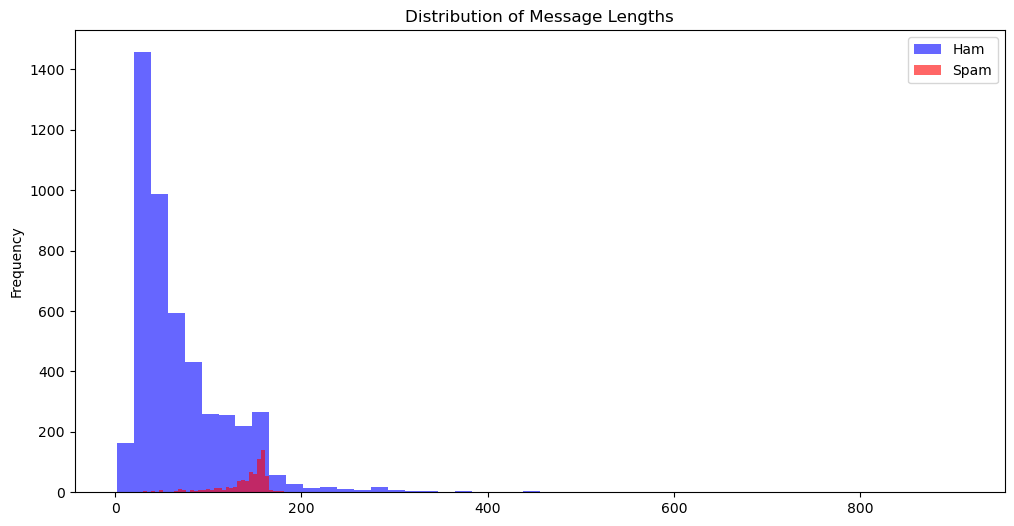

In [14]:
# Add a column for message length
df['length'] = df['email'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(12, 6))
df[df['type'] == 'ham']['length'].plot(bins=50, kind='hist', color='blue', label='Ham', alpha=0.6)
df[df['type'] == 'spam']['length'].plot(bins=50, kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.title('Distribution of Message Lengths')
plt.show()


In [15]:
df.head()

,type,email,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


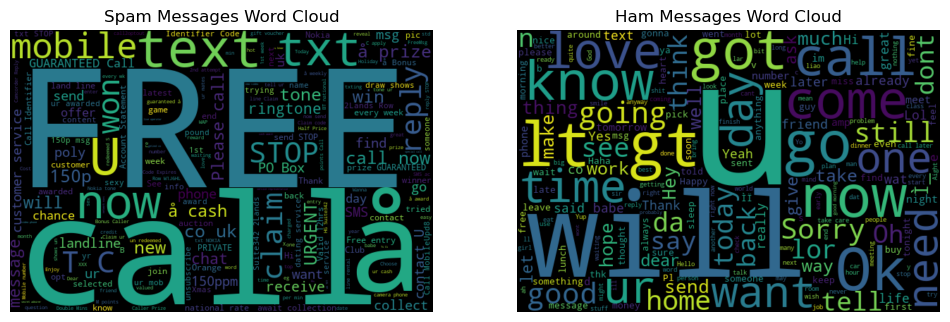

In [18]:
from wordcloud import WordCloud

# Generate word clouds for spam and ham messages
spam_words = ' '.join(list(df[df['type'] == 'spam']['email']))
ham_words = ' '.join(list(df[df['type'] == 'ham']['email']))

spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

# Plotting the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()


In [21]:
# Display the list of spam words
spam_word_freq = spam_wordcloud.words_
spam_word_list = list(spam_word_freq.items())

print("List of spam words and their frequencies:")
for word, freq in spam_word_list:
    print(f"{word}: {freq:.4f}")

# Display the list of ham words
ham_word_freq = ham_wordcloud.words_
ham_word_list = list(ham_word_freq.items())

print("\nList of ham words and their frequencies:")
for word, freq in ham_word_list:
    print(f"{word}: {freq:.4f}")

List of spam words and their frequencies:
FREE: 1.0000
call: 0.8500
å: 0.6450
text: 0.6300
U: 0.5900
txt: 0.5000
now: 0.5000
mobile: 0.4700
won: 0.3650
T C: 0.3300
claim: 0.3150
reply: 0.3100
STOP: 0.3100
call now: 0.2900
URGENT: 0.2800
win: 0.2700
new: 0.2700
tone: 0.2650
å prize: 0.2550
co uk: 0.2450
150p: 0.2400
Please call: 0.2300
å cash: 0.2250
will: 0.2200
message: 0.2100
chat: 0.2000
ringtone: 0.1750
receive: 0.1650
send: 0.1450
msg: 0.1400
want: 0.1350
poly: 0.1350
customer service: 0.1350
contact U: 0.1350
ur: 0.1300
go: 0.1250
SMS: 0.1200
landline: 0.1200
PO Box: 0.1200
150ppm: 0.1150
find: 0.1150
collect: 0.1150
phone: 0.1150
GUARANTEED Call: 0.1150
day: 0.1100
uk: 0.1100
offer: 0.1100
chance: 0.1100
prize GUARANTEED: 0.1100
contact: 0.1050
pic: 0.1050
week: 0.1000
customer: 0.1000
national rate: 0.1000
back: 0.0950
awarded: 0.0950
See: 0.0950
Club: 0.0950
Orange: 0.0950
send STOP: 0.0950
every week: 0.0950
await collection: 0.0950
PRIVATE: 0.0900
game: 0.0900
land line: 0.0

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['type'], test_size=0.2, random_state=42)

# Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Model pipelines
models = {
    "Naive Bayes": Pipeline([('tfidf', vectorizer), ('clf', MultinomialNB())]),
    "Logistic Regression": Pipeline([('tfidf', vectorizer), ('clf', LogisticRegression())]),
    "SVM": Pipeline([('tfidf', vectorizer), ('clf', SVC())]),
    "Random Forest": Pipeline([('tfidf', vectorizer), ('clf', RandomForestClassifier())])
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print("\n")


Model: Naive Bayes
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

[[965   0]
 [ 37 113]]


Model: Logistic Regression
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

[[962   3]
 [ 50 100]]


Model: SVM
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have predictions and true labels
for model_name, model in models.items():
    predictions = model.predict(X_test)
    print(f"Model: {model_name}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n")


Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
[[965   0]
 [ 37 113]]


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
[[962   3]
 [ 50 100]]


Model: SVM
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99  

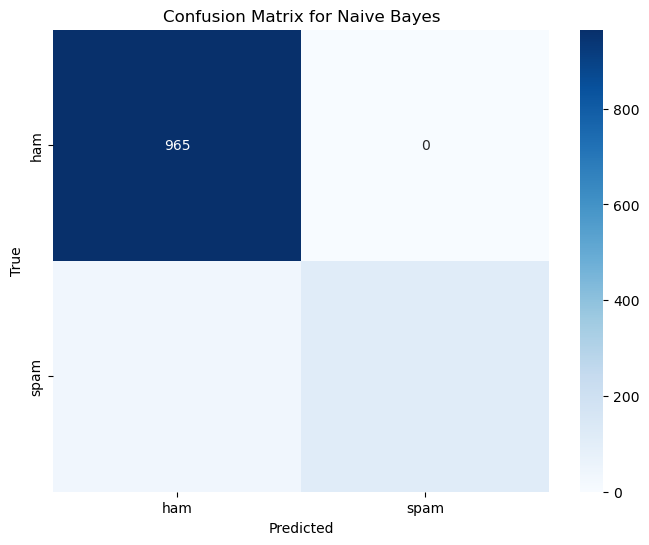

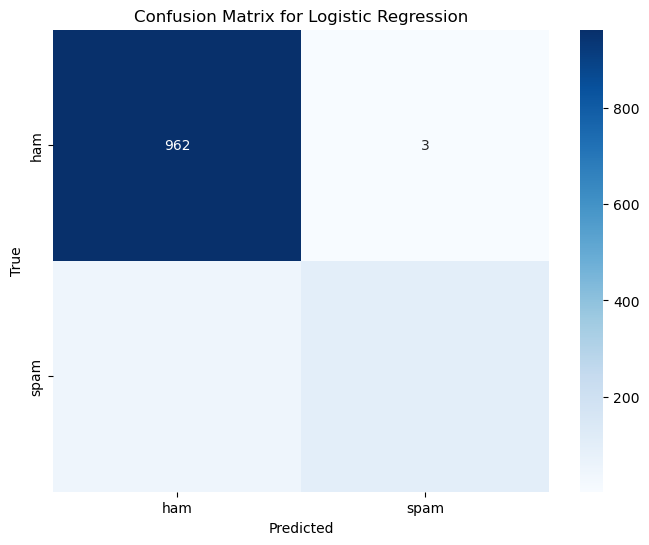

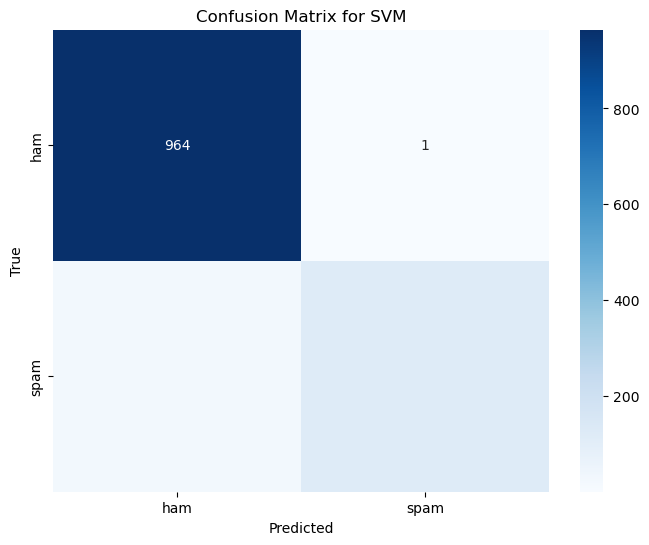

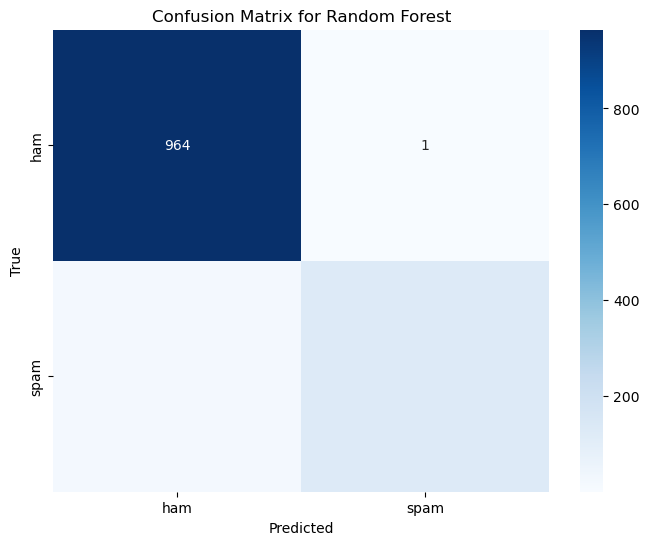

In [24]:
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

for model_name, model in models.items():
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, model_name)


In [25]:
import pandas as pd

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for model_name, model in models.items():
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(report['accuracy'])
    metrics["Precision"].append(report['spam']['precision'])
    metrics["Recall"].append(report['spam']['recall'])
    metrics["F1-Score"].append(report['spam']['f1-score'])

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.966816   1.000000  0.753333  0.859316
1  Logistic Regression  0.952466   0.970874  0.666667  0.790514
2                  SVM  0.976682   0.992063  0.833333  0.905797
3        Random Forest  0.978475   0.992188  0.846667  0.913669


In [26]:
# Sort models by F1-Score
best_model = metrics_df.sort_values(by="F1-Score", ascending=False).iloc[0]
print(f"The best model is {best_model['Model']} with an F1-Score of {best_model['F1-Score']:.2f}")


The best model is Random Forest with an F1-Score of 0.91


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the metrics to a 0-1 scale
scaler = MinMaxScaler()
metrics_df[['F1-Score', 'Precision', 'Recall']] = scaler.fit_transform(metrics_df[['F1-Score', 'Precision', 'Recall']])

# Compute a composite score
# You can adjust the weights as needed
weights = {'F1-Score': 0.4, 'Precision': 0.3, 'Recall': 0.3}
metrics_df['Composite Score'] = (metrics_df['F1-Score'] * weights['F1-Score'] +
                                 metrics_df['Precision'] * weights['Precision'] +
                                 metrics_df['Recall'] * weights['Recall'])

# Select the model with the highest composite score
best_model = metrics_df.sort_values(by='Composite Score', ascending=False).iloc[0]
print(f"The best model is {best_model['Model']} with a Composite Score of {best_model['Composite Score']:.2f}")


The best model is Random Forest with a Composite Score of 0.92
